In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

df = pd.read_csv('Mall_Customers.csv')

In [2]:
#1. zrób one-hot encoding na kolumnie Genere
#2. dodaj do df nową kolumnę "is_male"
#3. usuń niepotrzebne kolumny z df

In [3]:
temp = pd.get_dummies(df.Genre, prefix='is')

df['Is Male']=temp['is_Male']

#usuniecie niepotrzebnej/nadmiarowej kolumny
df = df.drop(["Genre", "CustomerID"], axis =1)

df

,Age,Annual Income (k$),Spending Score (1-100),Is Male
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0
...,...,...,...,...
195,35,120,79,0
196,45,126,28,0
197,32,126,74,1
198,32,137,18,1


Silhouette Coefficient:

Silhouette Coefficient or silhouette score is a metric used to calculate the goodness of a clustering technique. Its value ranges from -1 to 1.

1: Means clusters are well apart from each other and clearly distinguished.

0: Means clusters are indifferent, or we can say that the distance between clusters is not significant.

-1: Means clusters are assigned in the wrong way.

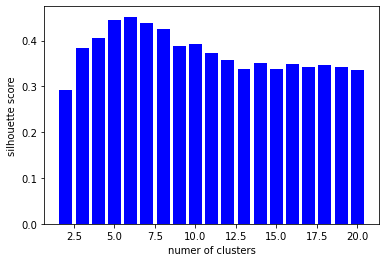

In [4]:
# sprawdzenie silhouette_score dla różnej liczby klastrów

from sklearn.metrics import silhouette_score

def get_kmeans_score(data, k):
    kmeans = KMeans(n_clusters=k)
    model = kmeans.fit(data)
    return silhouette_score(data, model.labels_, metric='euclidean')

results = []
k_list = list(range(2,21))

for k in k_list:
    results.append(get_kmeans_score(df, k))

plt.bar(k_list, results, color='b')
plt.xlabel('numer of clusters')
plt.ylabel('silhouette score')
plt.show()


Text(0.5, 0, 'Spending Score')

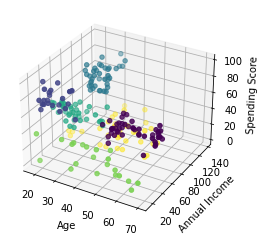

In [5]:
#wyświetl wykres 3D dla wybranej (wyznaczonej) liczby klastrów

#klasteryzacja za pomocą K-means i 6 klastrami

#do dalszej analizy bierzemy wszystkie kolumny, bo już usunęłam niepotrzebne
X_train = df

kmeans = KMeans(n_clusters=6)
model = kmeans.fit(X_train)
labels = model.predict(X_train) 

# wykres
# %matplotlib notebook

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(df["Age"], df["Annual Income (k$)"], df["Spending Score (1-100)"], c=labels)

ax.set_xlabel('Age')
ax.set_ylabel('Annual Income')
ax.set_zlabel('Spending Score')

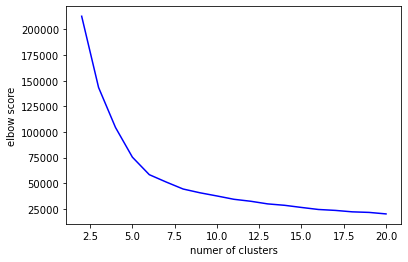

In [10]:
#Teraz policz to samo dla metody łokciowej. 
#Funkcja wygląda tak samo, poza jedną różnicą: return abs(model.score(data)) 

from sklearn.metrics import silhouette_score

def get_kmeans_score(data, k):
    kmeans = KMeans(n_clusters=k)
    model = kmeans.fit(data)
    return abs(model.score(data))

results = []
k_list = list(range(2,21))

for k in k_list:
    results.append(get_kmeans_score(df, k))

plt.plot(k_list, results, color='b')
# plt.bar wyświetli mi bary
plt.xlabel('numer of clusters')
plt.ylabel('elbow score')
plt.show()


wniosek: nie widać tu łokcia

In [7]:
#wyświetl wykres 3D dla wybranej (wyznaczonej) liczby klastrów

Text(0.5, 0, 'Spending Score')

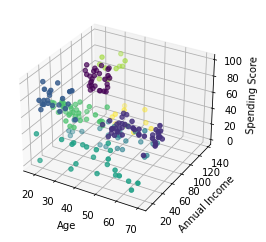

In [8]:
#klasteryzacja za pomocą K-means i 8 klastrami

#do dalszej analizy bierzemy wszystkie kolumny, bo już usunęłam niepotrzebne
X_train = df

kmeans = KMeans(n_clusters=8)
model = kmeans.fit(X_train)
labels = model.predict(X_train) 

# wykres
# %matplotlib notebook

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(df["Age"], df["Annual Income (k$)"], df["Spending Score (1-100)"], c=labels)

ax.set_xlabel('Age')
ax.set_ylabel('Annual Income')
ax.set_zlabel('Spending Score')